<b> Example of gammapy calculations </b>

In [23]:
# Import libaries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from gammapy import gammapy
from IPython.display import display
import time

In [24]:
# Import dataset 
data = np.loadtxt("Níquel 3D.txt", skiprows= 1, unpack=False)
df = pd.DataFrame(data, columns=['X','Y','Z','fe'])
display(df.describe())
display(df['fe'].var())

,X,Y,Z,fe
count,27230.000000,27230.000000,27230.000000,27230.000000
mean,1328.495560,861.570804,43.522550,0.646502
std,640.690994,280.783242,22.285439,0.495360
min,82.000000,145.000000,1.990000,0.023000
25%,750.750000,666.000000,25.250000,0.351000
50%,1368.810000,855.000000,37.805000,0.492000
75%,1884.880000,1049.000000,58.677500,0.753000
max,2606.440000,1853.000000,125.000000,4.320000


0.24538182567931555

In [37]:
# Create python object containing all experimental values 

nlags = 15
lagdistance= 30
lineartolerance = 15
htolerance = 45.0
vtolerance = 45.0
hband = 80
vband = 80
azimuth = 45
dip = 0

gamma = gammapy.funcs_3D(df,'X','Y','Z','fe','fe',nlags,lagdistance,
                         lineartolerance, htolerance, vtolerance, 
                         hband, vband, azimuth,dip)

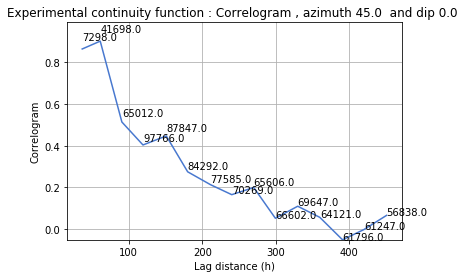

209.4078345298767


In [38]:
# Calculate variogram values 
gamma.choice = 6000
start = time.time()
variogram = gamma.calculate_experimental_function("Correlogram", plot_graph = True, show_pairs = True)
finish = time.time()
print(finish -start)

In [39]:
# Create python object containing all experimental values 

nlags = 20
lagdistance= 80
lineartolerance = 40
htolerance = 45.0
vtolerance = 45.0
hband = 80
vband = 80
azimuth = 135
dip = 0

gamma2 = gammapy.funcs_3D(df,'X','Y','Z','fe','fe',nlags,lagdistance,
                         lineartolerance, htolerance, vtolerance, 
                         hband, vband, azimuth,dip)

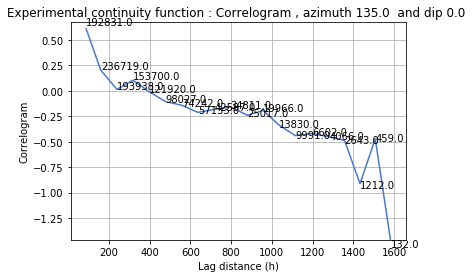

297.2434628009796


In [40]:
# Calculate variogram values 
gamma2.choice = 6000
start = time.time()
variogram2 = gamma2.calculate_experimental_function("Correlogram", plot_graph = True, show_pairs = True)
finish = time.time()
print(finish -start)

In [41]:
# Create python object containing all experimental values 

nlags = 10
lagdistance= 10
lineartolerance = 20
htolerance = 45.0
vtolerance = 45.0
hband = 20
vband = 20
azimuth = 0
dip = 90

gamma3 = gammapy.funcs_3D(df,'X','Y','Z','fe','fe',nlags,lagdistance,
                         lineartolerance, htolerance, vtolerance, 
                         hband, vband, azimuth,dip)

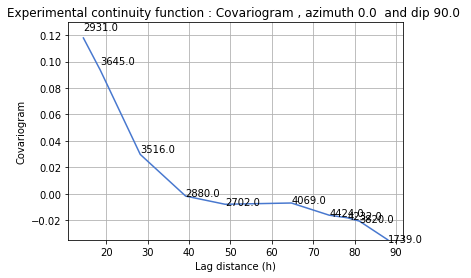

137.41669583320618


In [42]:
# Create python object containing all experimental values 

# Calculate variogram values 
gamma3.choice = 6000
start = time.time()
variogram3 = gamma3.calculate_experimental_function("Covariogram", plot_graph = True, show_pairs = True)
finish = time.time()
print(finish -start)

[0. 1. 0.]


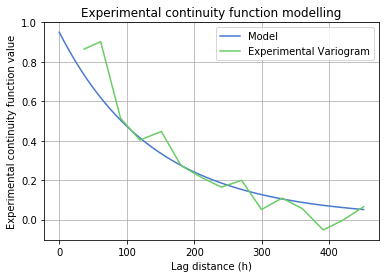

[-1.00000000e+00  1.11022302e-16  0.00000000e+00]


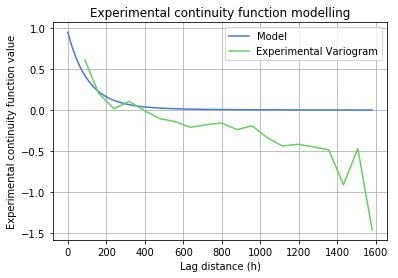

[4.32978028e-17 4.32978028e-17 1.00000000e+00]


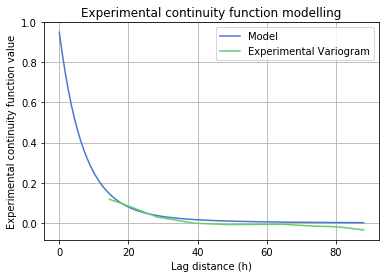

In [49]:
# Modelling experimental variogram

rotation_reference = [45,0,0]
ranges = [[400,300,20],[900,800,60]]
model_func = ["Exponential","Exponential"]
contribution = [0.8,0.05]
nugget = 0.05

model_value = gamma.modelling(experimental_dataframe = variogram, 
                rotation_reference = rotation_reference ,
                model_func = model_func,
                ranges =ranges ,
                contribution = contribution,
                nugget = nugget,
                inverted = True)



model_value2 = gamma2.modelling(experimental_dataframe = variogram2, 
                rotation_reference = rotation_reference ,
                model_func = model_func,
                ranges =ranges ,
                contribution = contribution,
                nugget = nugget,
                inverted = True)



model_value3 = gamma3.modelling(experimental_dataframe = variogram3, 
                rotation_reference = rotation_reference ,
                model_func = model_func,
                ranges =ranges ,
                contribution = contribution,
                nugget = nugget,
                inverted = True)


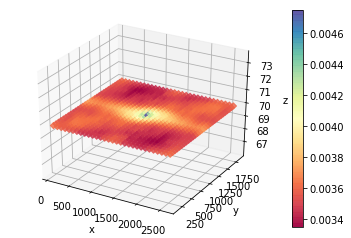

In [51]:
# Calculate average covariogram maps in three dimensions 
gamma.covariogram_map_3d('fe',10,division=30, cutz=[67,70], alpha=0.8)
